In [ ]:
import pandas as pd
df = pd.read_csv("gene_expression.csv")
df.head()

In [2]:
df.columns = df.columns.str.strip().str.lower()
df.head()

,gene_id,gene_name,tissue,expression_level
0,G001,TP53,Liver,42.0
1,G001,TP53,Brain,11.3
2,G001,TP53,Heart,23.8
3,G002,BRCA1,Liver,21.2
4,G002,BRCA1,Brain,46.8


In [3]:
df['tissue'].unique()

array(['Liver', 'Brain', 'Heart'], dtype=object)

In [4]:
avg_gene_expr = df.groupby('gene_name')['expression_level'].mean().sort_values(ascending = False) 
avg_gene_expr


gene_name
BRCA1    37.266667
EGFR     33.333333
TP53     25.700000
APOE     24.566667
MYC      22.566667
Name: expression_level, dtype: float64

In [5]:
pivot = pd.pivot_table(df, index = 'gene_name', columns = 'tissue', values = 'expression_level') 

In [6]:
pivot

tissue,Brain,Heart,Liver
gene_name,,,
APOE,19.9,42.5,11.3
BRCA1,46.8,43.8,21.2
EGFR,14.3,31.1,54.6
MYC,20.9,35.3,11.5
TP53,11.3,23.8,42.0


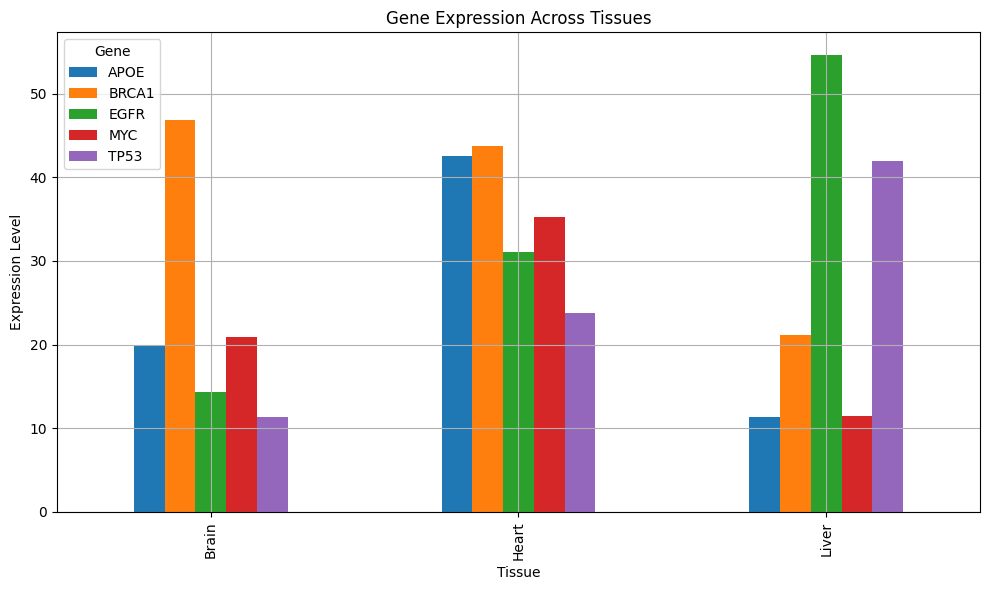

In [7]:
import matplotlib.pyplot as plt

pivot.T.plot(kind='bar',figsize=(10,6))

plt.title('Gene Expression Across Tissues')
plt.ylabel('Expression Level')
plt.xlabel('Tissue')
plt.grid(True)
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

In [8]:
pivot.to_csv("gene_expression_summary.csv")